In [12]:
import pandas as pd
from pathlib import Path

data_dir = Path("..") / "data"

df = pd.read_csv(data_dir / "train.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1194,1194,2013-01-01,42,CELEBRATION,0.0,0
1193,1193,2013-01-01,42,BREAD/BAKERY,0.0,0
1192,1192,2013-01-01,42,BOOKS,0.0,0
1191,1191,2013-01-01,42,BEVERAGES,0.0,0


In [14]:
df.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [20]:
daily_sales = df.groupby("date")["sales"].sum()

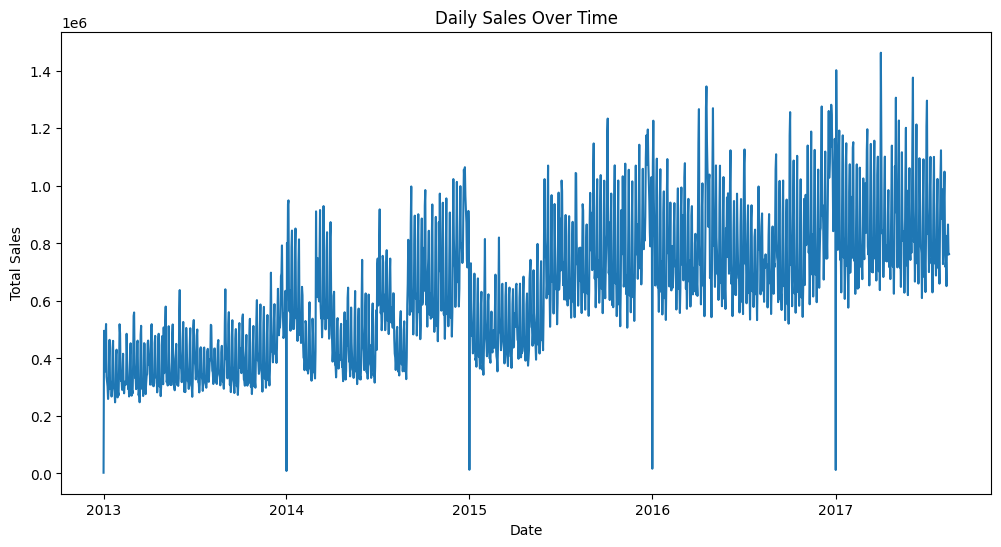

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [26]:
df["day_of_week"] = df["date"].dt.dayofweek
df["year"] = df["date"].dt.year

print(df.groupby("day_of_week")["sales"].mean())
df.groupby("year")["sales"].mean()

day_of_week
0    346.544732
1    319.823843
2    332.909401
3    283.540517
4    325.238138
5    433.336472
6    463.085366
Name: sales, dtype: float64


year
2013    216.479530
2014    322.939786
2015    371.357193
2016    443.790297
2017    480.124466
Name: sales, dtype: float64